## Marketing Analytics Project

### Customer Segmentation using Machine Learning

In [1]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [20]:
data = pd.read_csv("C:\\Users\\dines\\Downloads\\Orders - Analysis Task.csv", encoding= 'ISO-8859-1')

In [21]:
data.shape

(70052, 17)

In [22]:
data.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657.0,1312378.0,8.330000e+13,12/4/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686.0,3715657.0,3.630000e+13,4/1/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862.0,9533448.0,7.310000e+13,11/5/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868.0,4121004.0,5.360000e+13,2/19/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868.0,4121004.0,2.930000e+13,2/19/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


In [23]:
data.describe()

,variant_id,customer_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
count,7.005200e+04,7.005200e+04,7.005200e+04,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000
mean,2.441554e+11,6.013259e+11,5.506056e+13,0.701179,61.776302,-4.949904,-10.246051,46.580348,9.123636,55.703982,-0.156098,0.857277
std,4.253916e+12,6.223346e+12,2.587611e+13,0.739497,31.800689,7.769972,25.154677,51.802690,10.305236,61.920557,0.369190,0.380820
min,1.001447e+07,1.000661e+06,1.000000e+13,-3.000000,0.000000,-200.000000,-237.500000,-237.500000,-47.500000,-285.000000,-3.000000,0.000000
25%,2.692223e+07,3.295695e+06,3.270000e+13,1.000000,51.670000,-8.340000,0.000000,47.080000,8.375000,56.227500,0.000000,1.000000
50%,4.494514e+07,5.566107e+06,5.520000e+13,1.000000,74.170000,0.000000,0.000000,63.330000,12.660000,76.000000,0.000000,1.000000
75%,7.743106e+07,7.815352e+06,7.740000e+13,1.000000,79.170000,0.000000,0.000000,74.170000,14.840000,89.000000,0.000000,1.000000
max,8.420000e+13,9.980000e+13,1.000000e+14,6.000000,445.000000,0.000000,0.000000,445.000000,63.340000,445.000000,0.000000,6.000000


In [24]:
data.net_quantity

0        2
1        2
2        0
3        1
4        1
        ..
70047   -3
70048   -3
70049   -3
70050   -3
70051   -3
Name: net_quantity, Length: 70052, dtype: int64

In [25]:
data.isnull().sum()

product_title             0
product_type              0
variant_title             0
variant_sku               0
variant_id                0
customer_id               0
order_id                  0
day                       0
net_quantity              0
gross_sales               0
discounts                 0
returns                   0
net_sales                 0
taxes                     0
total_sales               0
returned_item_quantity    0
ordered_item_quantity     0
dtype: int64

In [26]:
products_ordered = data.groupby(data.customer_id).product_type.count().reset_index()

In [27]:
products_ordered

,customer_id,product_type
0,1.000661e+06,5
1,1.001914e+06,1
2,1.002167e+06,4
3,1.002387e+06,1
4,1.002419e+06,3
...,...,...
25486,9.890000e+13,3
25487,9.900000e+13,1
25488,9.930000e+13,4
25489,9.950000e+13,1


In [28]:
total_sales = data.groupby(['customer_id']).agg({'net_sales': lambda x: x.sum()}).reset_index()

In [29]:
total_sales

,customer_id,net_sales
0,1.000661e+06,72.22
1,1.001914e+06,66.00
2,1.002167e+06,139.54
3,1.002387e+06,74.17
4,1.002419e+06,44.25
...,...,...
25486,9.890000e+13,202.09
25487,9.900000e+13,74.17
25488,9.930000e+13,148.33
25489,9.950000e+13,53.33


In [30]:
data['avg_return_rate'] = data.returned_item_quantity/data.ordered_item_quantity

In [31]:
avg_return_rate = data.groupby(['customer_id']).agg({'avg_return_rate': lambda x: x.sum()}).reset_index()

In [32]:
avg_return_rate

,customer_id,avg_return_rate
0,1.000661e+06,-inf
1,1.001914e+06,0.0
2,1.002167e+06,-inf
3,1.002387e+06,0.0
4,1.002419e+06,-inf
...,...,...
25486,9.890000e+13,0.0
25487,9.900000e+13,0.0
25488,9.930000e+13,-inf
25489,9.950000e+13,0.0


In [33]:
rfm= data.groupby('customer_id').agg({'order_id': lambda order_id: len(order_id),
                                      'net_sales': lambda net_sales: net_sales.sum(),
                                     'avg_return_rate': lambda x: x.sum()})

In [34]:
rfm

,order_id,net_sales,avg_return_rate
customer_id,,,
1.000661e+06,5.0,72.22,-inf
1.001914e+06,1.0,66.00,0.0
1.002167e+06,4.0,139.54,-inf
1.002387e+06,1.0,74.17,0.0
1.002419e+06,3.0,44.25,-inf
...,...,...,...
9.890000e+13,3.0,202.09,0.0
9.900000e+13,1.0,74.17,0.0
9.930000e+13,4.0,148.33,-inf


In [76]:
data.day.min()

Timestamp('2018-11-01 00:00:00')

In [75]:
data.day.max()

Timestamp('2019-04-30 00:00:00')

In [15]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2019, 6, 4)

# Convert date to datetime format
data['day'] = pd.to_datetime(data['day'])

In [16]:
rfm= data.groupby('customer_id').agg({'day': lambda days: (PRESENT - days.max()).days,
                                        'order_id': lambda order_id: len(order_id),
                                        'net_sales': lambda net_sales: net_sales.sum()})

In [17]:
rfm

,day,order_id,net_sales
customer_id,,,
1.000661e+06,193,3.0,216.67
1.001914e+06,193,1.0,66.00
1.002167e+06,88,3.0,195.17
1.002387e+06,79,1.0,74.17
1.002419e+06,149,2.0,85.83
...,...,...,...
9.780000e+13,74,5.0,215.83
9.890000e+13,67,3.0,202.09
9.900000e+13,64,1.0,74.17


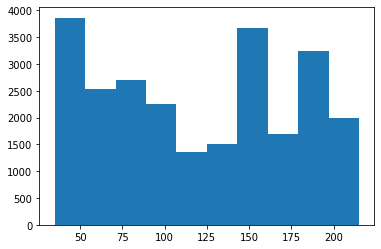

In [18]:
plt.hist(rfm.day)
plt.show()

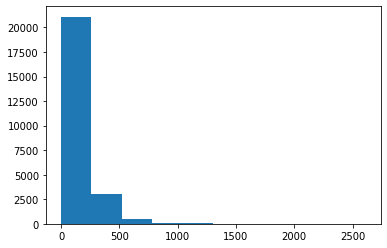

In [19]:
plt.hist(rfm.net_sales)
plt.show()

(array([2.2103e+04, 2.2140e+03, 3.5700e+02, 8.8000e+01, 3.4000e+01,
        1.2000e+01, 4.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([ 1. ,  4.8,  8.6, 12.4, 16.2, 20. , 23.8, 27.6, 31.4, 35.2, 39. ]),
 <a list of 10 Patch objects>)

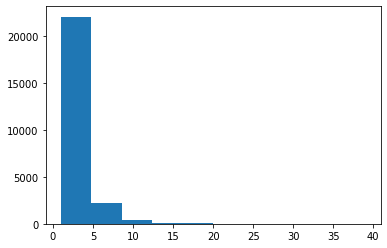

In [20]:
plt.hist(rfm.order_id)

In [21]:
rfm.columns=['recency','frequency','monetary']

In [22]:
rfm['recency'] = rfm['recency'].astype(int)

In [23]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [77]:
rfm['frequency'] = rfm['frequency'].astype(int)

In [78]:
rfm.head()

,recency,frequency,monetary
customer_id,,,
1000661.0,193,3,216
1001914.0,193,1,66
1002167.0,88,3,195
1002387.0,79,1,74
1002419.0,149,2,85


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CD881B088>]],
      dtype=object)

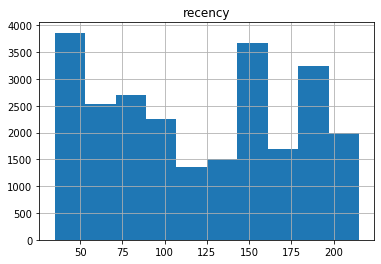

In [25]:
# Histogram for Recency Data (UK)
rfm.hist(column='recency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CD886C748>]],
      dtype=object)

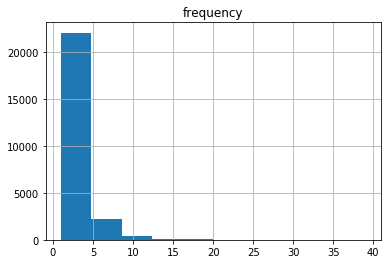

In [26]:
# Histogram for Frequency Data (UK)

rfm.hist(column='frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CD8914C48>]],
      dtype=object)

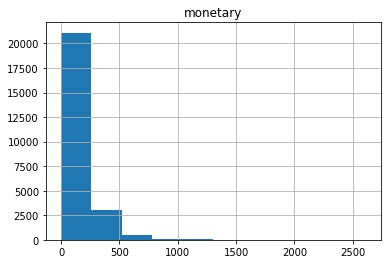

In [27]:
# Histogram for Monetary Data (UK)
rfm.hist(column='monetary')

In [28]:
# Save the cleaned file
rfm.to_csv('rfm.csv')

In [29]:
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 61.0, 0.4: 96.0, 0.6: 148.0, 0.8: 182.0},
 'frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 2.0, 0.8: 3.0},
 'monetary': {0.2: 66.0, 0.4: 82.0, 0.6: 145.0, 0.8: 225.0}}

In [30]:
rfm_segment = rfm.copy()

In [31]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5 

In [32]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [33]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score
customer_id,,,,,,,
1000661.0,193,3.0,216,1,4,4,144
1001914.0,193,1.0,66,1,1,1,111
1002167.0,88,3.0,195,4,4,4,444
1002387.0,79,1.0,74,4,1,2,412
1002419.0,149,2.0,85,2,3,3,233


In [34]:
segt_map = {
    r'[1-2][1-2]': 'at risk',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'need attention',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'new customers',
    r'51': 'new customers',
    r'[4-5][2-3]': 'champions',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
customer_id,,,,,,,,
1000661.0,193,3.0,216,1,4,4,144,at risk
1001914.0,193,1.0,66,1,1,1,111,at risk
1002167.0,88,3.0,195,4,4,4,444,loyal customers
1002387.0,79,1.0,74,4,1,2,412,new customers
1002419.0,149,2.0,85,2,3,3,233,at risk


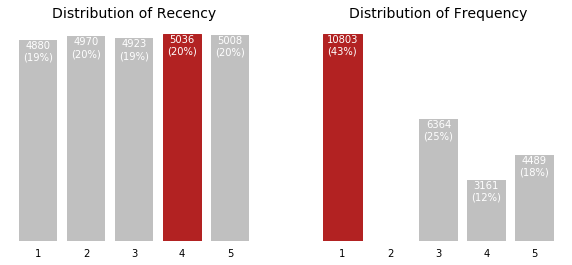

In [35]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show()

In [36]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't loose         947
new customers      3217
loyal customers    3309
need attention     3549
champions          4892
at risk            8903
Name: Segment, dtype: int64

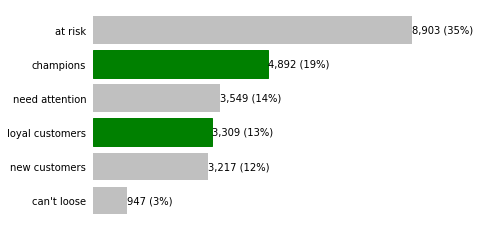

In [37]:
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [38]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
customer_id,,,,,,,,
8325158.0,39,37.0,2609,5,5,5,555,champions
6578818.0,40,36.0,2185,5,5,5,555,champions
7843272.0,35,31.0,2106,5,5,5,555,champions
7653992.0,48,17.0,1869,5,5,5,555,champions
4509306.0,37,28.0,1799,5,5,5,555,champions


In [39]:
rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
customer_id,,,,,,,,
5529354.0,190,12.0,821,1,5,5,155,can't loose
5806564.0,194,10.0,718,1,5,5,155,can't loose
2085902.0,190,11.0,686,1,5,5,155,can't loose
1586393.0,198,7.0,682,1,5,5,155,can't loose
5408532.0,200,8.0,644,1,5,5,155,can't loose


In [40]:
rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
customer_id,,,,,,,,
7373135.0,215,1.0,63,1,1,1,111,at risk
2015557.0,215,1.0,53,1,1,1,111,at risk
1200204.0,215,1.0,53,1,1,1,111,at risk
8023084.0,215,1.0,66,1,1,1,111,at risk
8017033.0,215,1.0,61,1,1,1,111,at risk


In [41]:
rfm = pd.read_csv('rfm.csv', index_col ='customer_id')

In [42]:
rfm.recency.min()

35

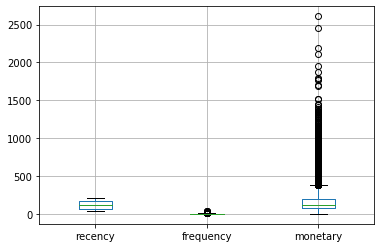

In [43]:
# Create box plots to check for outliers
rfm.boxplot()

In [44]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

[[1.29665541 0.2889426  0.39202633]
 [1.29665541 0.65568769 0.65530483]
 [0.58632303 0.2889426  0.24539997]
 ...
 [1.01671811 0.65568769 0.59944717]
 [1.63738484 0.2889426  0.43391958]
 [1.60151859 0.65568769 0.74607353]]


In [45]:
rfm_clean = rfm[(z < 3).all(axis=1)]

In [46]:
rfm.shape

(24817, 3)

In [47]:
rfm_clean.shape

(24225, 3)

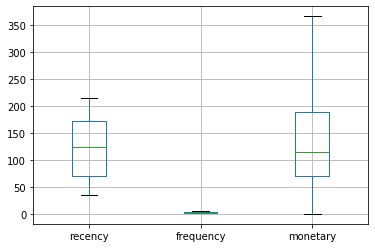

In [48]:
rfm_clean.boxplot(showfliers=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CD83F3948>]],
      dtype=object)

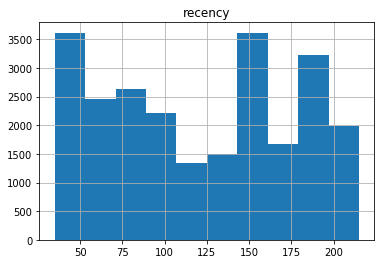

In [49]:
rfm_clean.hist(column='recency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CD836D7C8>]],
      dtype=object)

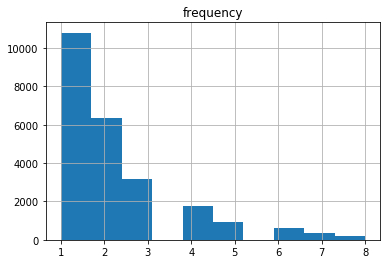

In [50]:
rfm_clean.hist(column='frequency')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CDB30F9C8>]],
      dtype=object)

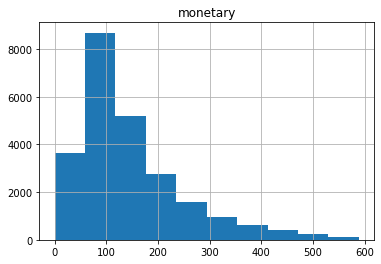

In [51]:
rfm_clean.hist(column='monetary')

In [52]:
X=rfm_clean

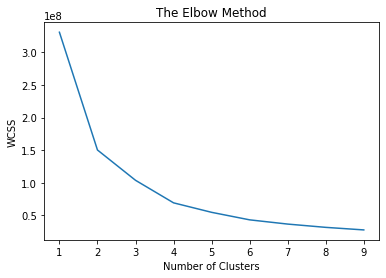

In [53]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [55]:
# Adding cluster ID to the dataframe
rfm_clean['Cluster_ID'] = y_kmeans

In [56]:
rfm_clean.groupby('Cluster_ID').mean()

,recency,frequency,monetary
Cluster_ID,,,
0,73.311712,1.751351,115.790766
1,171.615027,1.471174,95.002604
2,98.540623,4.631453,321.363973


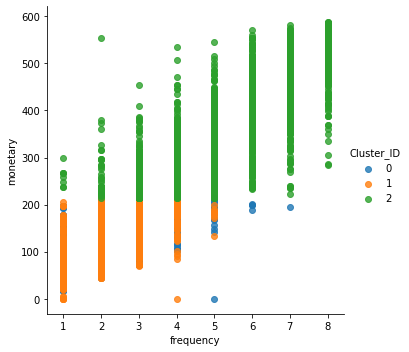

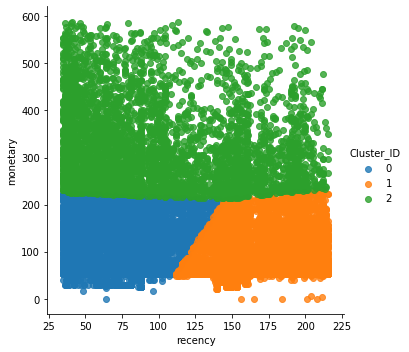

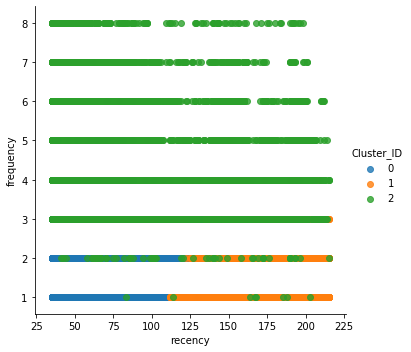

In [57]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

In [58]:
# Fitting K Means to the Datatset using k = 4

kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(X)

In [59]:
# Adding cluster ID to the dataframe
rfm_clean['Cluster_ID'] = y_kmeans

In [60]:
rfm_clean.groupby('Cluster_ID').mean()

,recency,frequency,monetary
Cluster_ID,,,
0,172.579348,1.373642,88.118997
1,86.660890,5.932409,415.901791
2,73.387693,1.498006,98.386364
3,106.823472,3.430385,233.781097


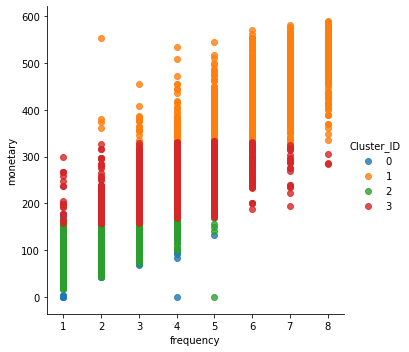

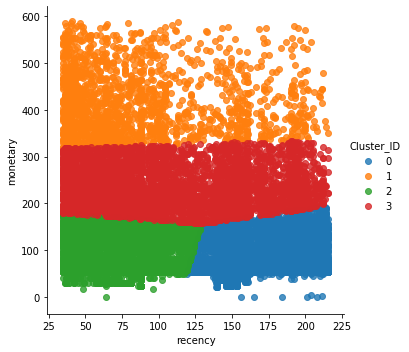

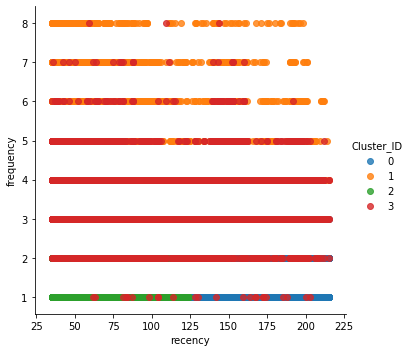

In [61]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

In [62]:
for i in range(2): rfm_clean_mean= rfm_clean.groupby(["Cluster_ID"]).mean()

rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,172.579348,1.373642,88.118997
1,86.660890,5.932409,415.901791
2,73.387693,1.498006,98.386364
3,106.823472,3.430385,233.781097


In [63]:
# Import the libraries
import scipy.cluster.hierarchy as sch

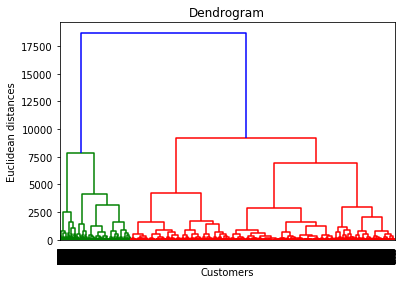

In [64]:
# Build a dendrogram using the minimum variance method
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [65]:
# Train the hierarchical clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [66]:
X['Cluster_ID'] = y_hc

In [67]:
X.head()

,recency,frequency,monetary,Cluster_ID
customer_id,,,,
1000661.0,193,3.0,216,0
1001914.0,193,1.0,66,0
1002167.0,88,3.0,195,2
1002387.0,79,1.0,74,2
1002419.0,149,2.0,85,0


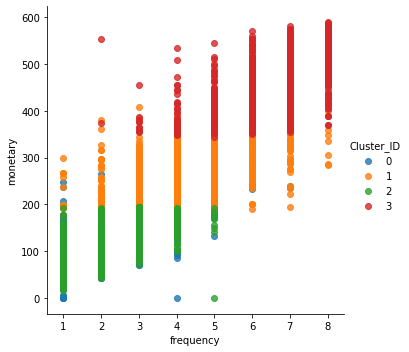

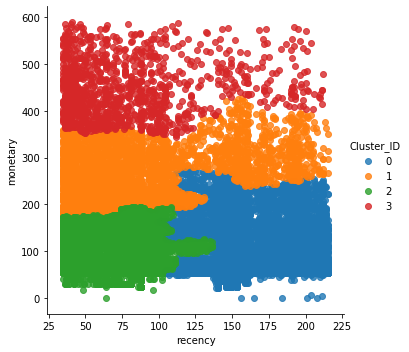

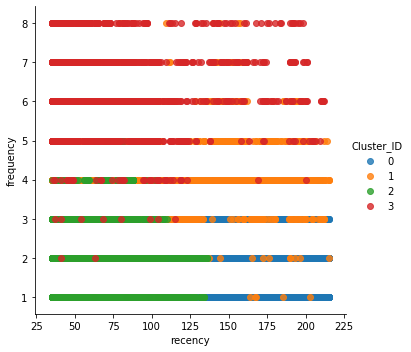

In [68]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

In [69]:
# Import libraries
from sklearn import cluster
from sklearn import metrics

In [70]:
# Calculate Silhouette score for different cluster values
krange = list(range(2,8))
avg_silhouettes = []
for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=10)
  cluster_assignments = model.fit_predict(X)

  silhouette_avg = metrics.silhouette_score(X, cluster_assignments)
  avg_silhouettes.append(silhouette_avg)

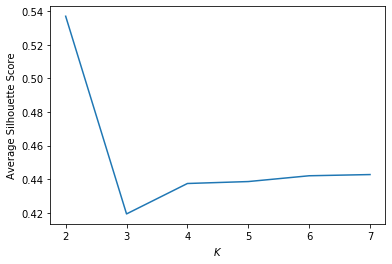

In [71]:
# PLot the score
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()